
# **1. Import Required Libraries**


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


# **2. Load Dataset**

In [3]:

df = pd.read_excel("/kaggle/input/datasets/durgeshchungle/heart-di/heart_disease.xlsx" ,sheet_name="Heart_disease")


### **Display first 5 rows**

In [4]:
print(df.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


# **3️⃣ Exploratory Data Analysis (EDA)**

## **🔹 Dataset Info**

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


## **🔹 Check Missing Values**

In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

## **🔹 Distribution of Features**

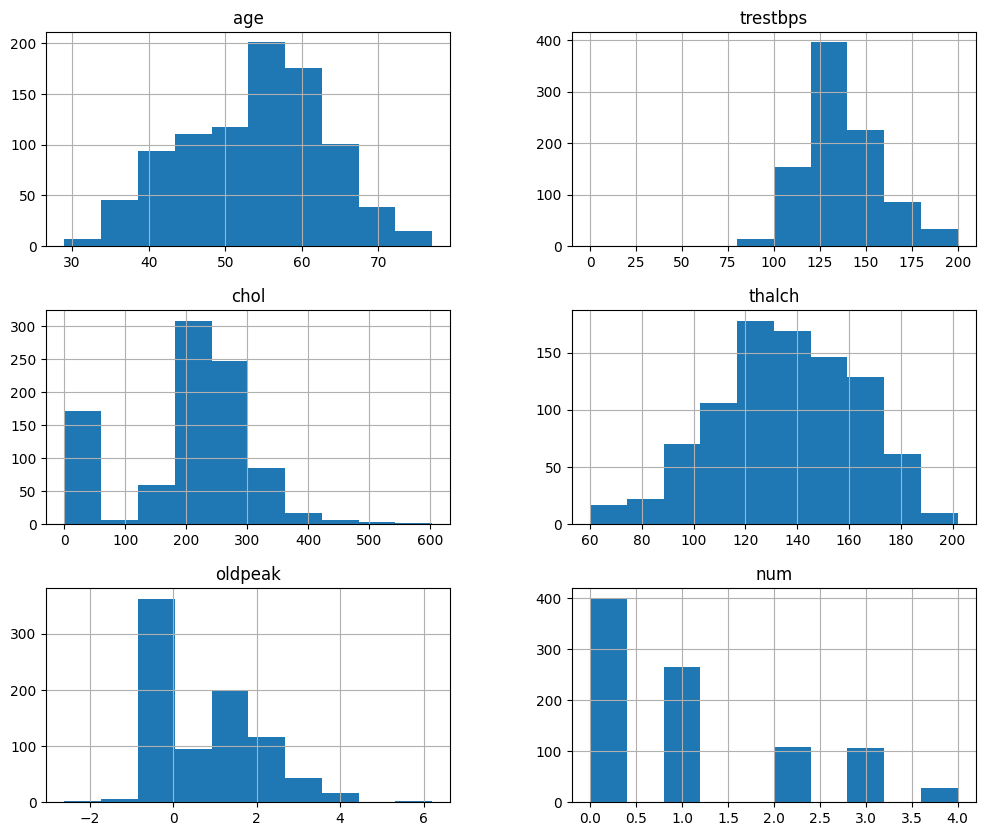

In [8]:
df.select_dtypes(include=['number']).hist(figsize=(12,10))
plt.show()

## **🔹 Correlation Matrix**

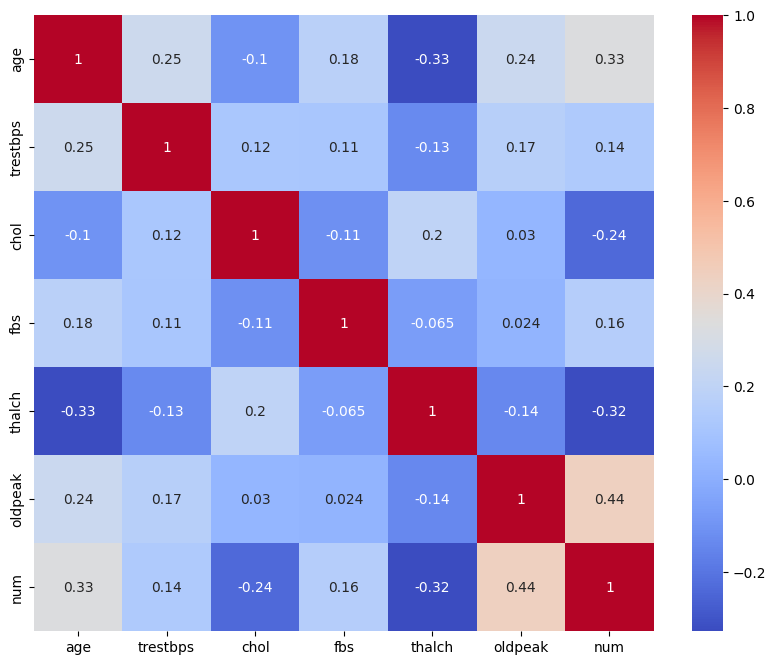

In [9]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap="coolwarm")

plt.show()

## **🔹 Boxplots (Outlier Detection)**

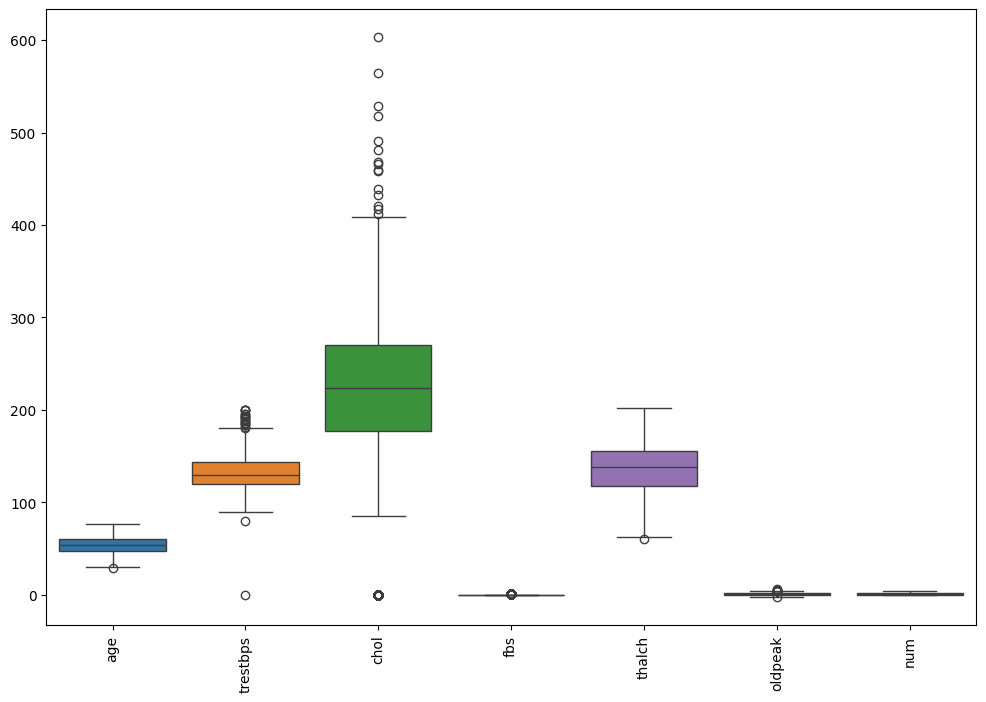

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# **3 Feature Engineering**

## **Handle Target Variable**

In [11]:
# If target column contains values >1 convert to binary
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

## **🔹 Separate Features & Targe**

In [12]:
X = df.drop('num', axis=1)
y = df['num']

# Convert categorical variables


In [13]:

X = pd.get_dummies(X, drop_first=True)

In [14]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
# Fix TRUE/FALSE text
X = X.replace({'TRUE': True, 'FALSE': False})

## **🔹 Handle Missing Values (if any)**

In [16]:





# Handle missing values
X = X.fillna(X.median())

# **5️⃣ Train-Test Split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **6️⃣ Train Decision Tree Model**

In [18]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# **7️⃣ Model Evaluation**

In [19]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7197802197802198

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72        89
           1       0.73      0.72      0.72        93

    accuracy                           0.72       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.72      0.72       182



## **🔹 Confusion Matrix**

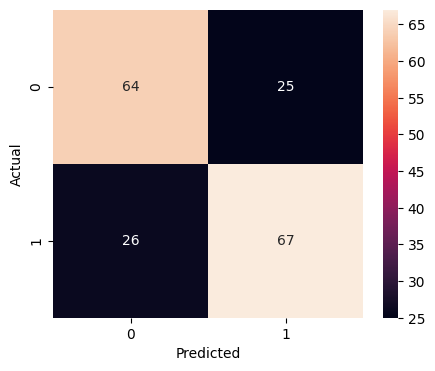

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **🔹 ROC-AUC Score**

In [21]:
y_prob = dt.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.7197656155611937


# **8️⃣ Hyperparameter Tuning**

In [22]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='accuracy')

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


## **🔹 Train Optimized Model**

In [23]:
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))

Optimized Accuracy: 0.7637362637362637


# **9️⃣ Visualize Decision Tree**

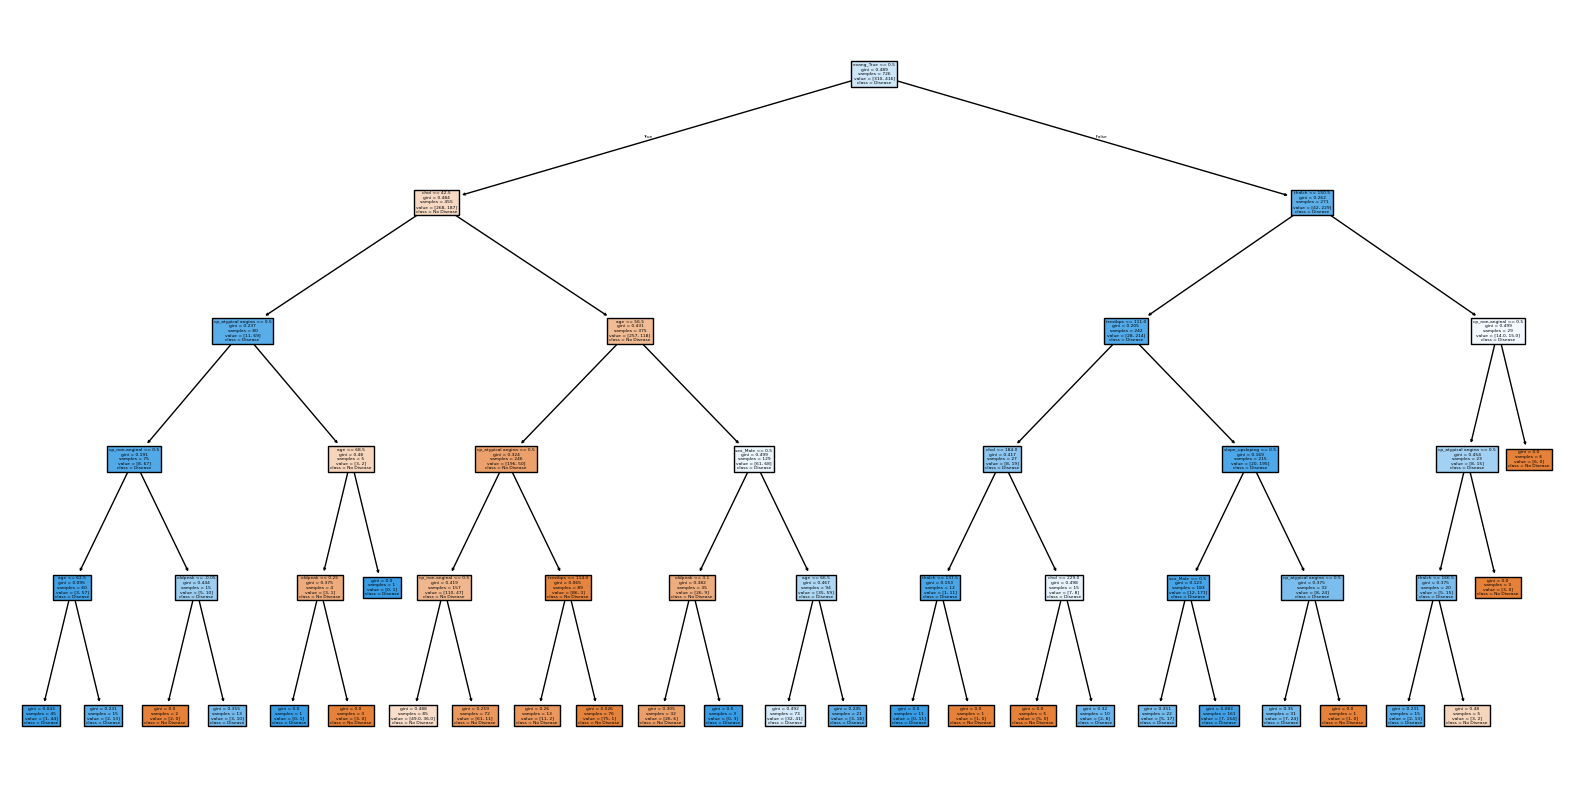

In [24]:
plt.figure(figsize=(20,10))
plot_tree(best_dt,
          feature_names=X.columns,
          class_names=["No Disease","Disease"],
          filled=True)
plt.show()

# **Interview Questions**
## **1️⃣ Common Decision Tree Hyperparameters**

### **Important hyperparameters:**

* max_depth → limits tree depth, prevents overfitting

* min_samples_split → minimum samples needed to split a node

* min_samples_leaf → minimum samples in a leaf node

* criterion → split quality (gini or entropy)

* max_features → number of features considered per split

* Proper tuning improves accuracy and reduces overfitting.

## **2️⃣ Label Encoding vs One-Hot Encoding**
### **🔹 Label Encoding**

Converts categories into numbers

Example: Red=0, Blue=1, Green=2

Best for ordinal data

### **🔹 One-Hot Encoding**

Creates binary columns for each category

Example:

Color	Red	Blue	Green
Red	1	0	0

Best for nominal data (no order)